In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("default")

from skimage import exposure
from skimage.restoration import denoise_tv_chambolle

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping

import tensorflow as tf

import os

In [2]:
def preprocessing_image(image):
    #image = exposure.equalize_adapthist(image)
    image = denoise_tv_chambolle(image, weight=0.1, multichannel=True)
    return image

def plot_result_fitting(history):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

    ax[0].plot(history.history['accuracy'], label='accuracy')
    ax[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax[0].set_title('Evolution de la précision')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(history.history['loss'], label='loss')
    ax[1].plot(history.history['val_loss'], label = 'val_loss')
    ax[1].set_title('Evolution de la fonction de perte')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.savefig('./cnn_retention_map.png',
                transparent=True)
    
    return None

---

In [3]:
def image_preprocess(image):
    image = tf.image.per_image_standardization(image)
    return image

def image_datagen_load():
    datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

    train_datagen = datagen.flow_from_directory(
                    '../input/stanford-dogs-dataset/images/Images/',
                    subset='training')

    test_datagen = datagen.flow_from_directory(
                    '../input/stanford-dogs-dataset/images/Images/',
                    subset='validation')
    
    return train_datagen, test_datagen


In [4]:
train_train, val_train = image_datagen_load()

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


In [5]:
model = Sequential()

# Base d'un CNN
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Spécifique au données
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(len(train_train.class_indices), activation='softmax'))

# Résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0

Epoch 1/100
516/516 [==============================] - 121s 234ms/step - loss: 4.7794 - accuracy: 0.0106 - val_loss: 4.7563 - val_accuracy: 0.0120
Epoch 2/100
516/516 [==============================] - 90s 175ms/step - loss: 4.7327 - accuracy: 0.0170 - val_loss: 4.7166 - val_accuracy: 0.0189
Epoch 3/100
516/516 [==============================] - 90s 174ms/step - loss: 4.6887 - accuracy: 0.0228 - val_loss: 4.6707 - val_accuracy: 0.0236
Epoch 4/100
516/516 [==============================] - 90s 174ms/step - loss: 4.6438 - accuracy: 0.0294 - val_loss: 4.6270 - val_accuracy: 0.0295
Epoch 5/100
516/516 [==============================] - 90s 174ms/step - loss: 4.5591 - accuracy: 0.0342 - val_loss: 4.5482 - val_accuracy: 0.0285
Epoch 6/100
516/516 [==============================] - 90s 175ms/step - loss: 4.4794 - accuracy: 0.0440 - val_loss: 4.4900 - val_accuracy: 0.0383
Epoch 7/100
516/516 [==============================] - 90s 175ms/step - loss: 4.4041 - accuracy: 0.0516 - val_loss: 4.4148 

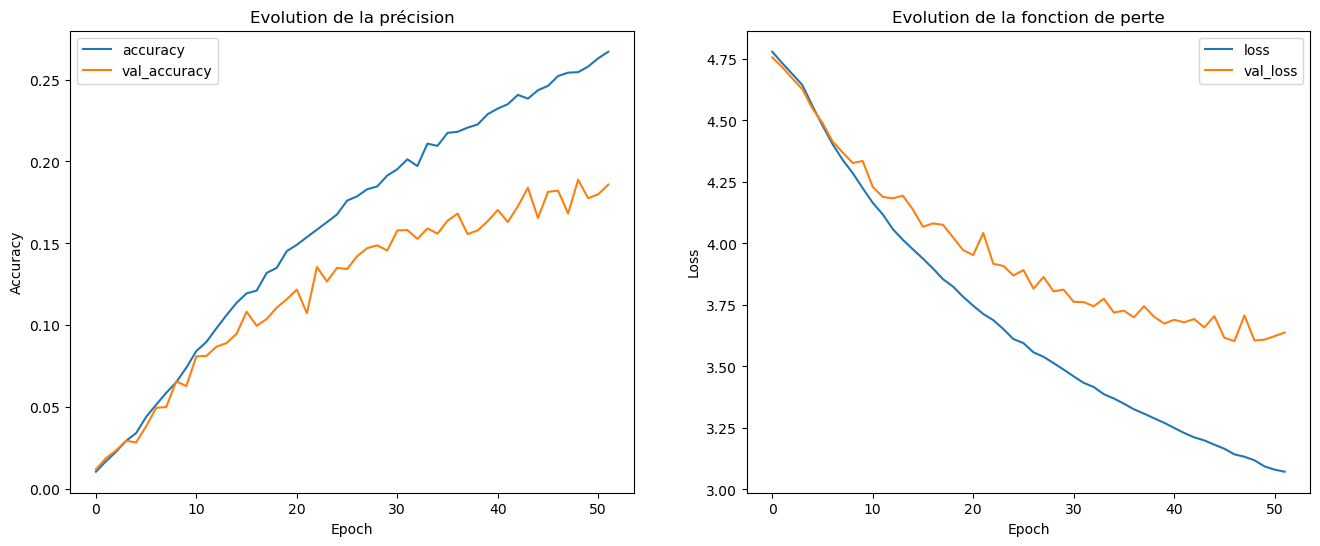

In [6]:
model.compile(optimizer='adam', # TO DO : essayer avec RMSprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=5)

history = model.fit(train_train, validation_data=val_train, epochs=100, callbacks = [early_stopping_monitor])

plot_result_fitting(history)

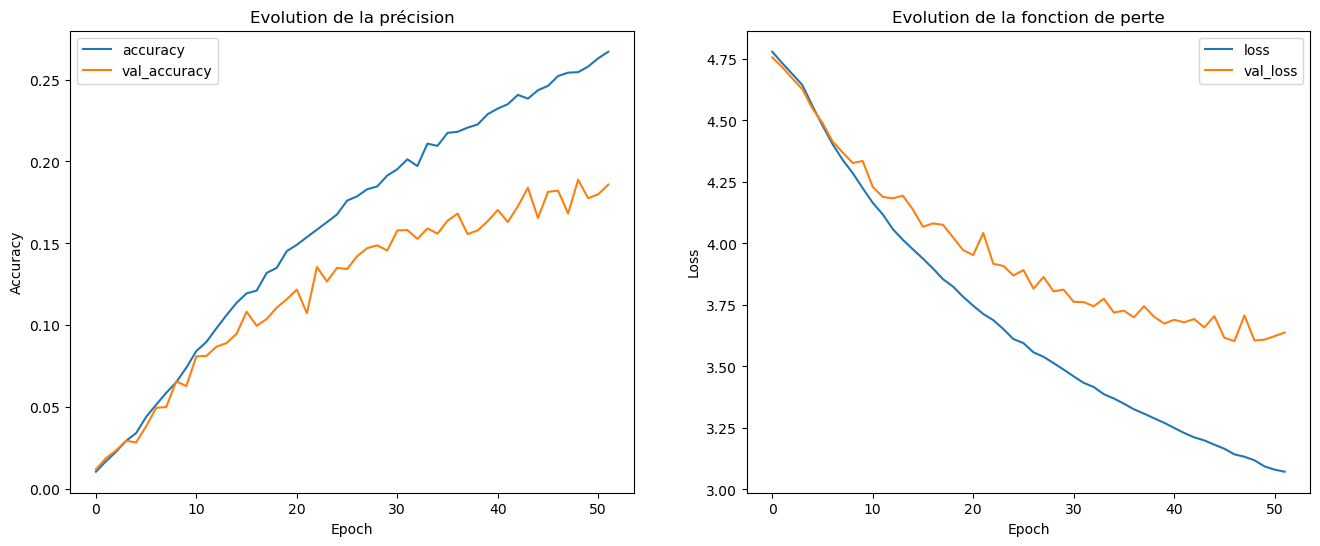

In [7]:
plot_result_fitting(history)

In [8]:
model.evaluate(test)

NameError: name 'test' is not defined

In [9]:
model.layers

In [10]:
conv1 = model.layers[0]
weights1 = conv1.get_weights()
len(weights1)

2

In [11]:
kernels1 = weights1[0]
kernels1.shape

(3, 3, 3, 32)

In [12]:
kernel1_1 = kernels1[:, :, 0, 0]
kernel1_1.shape

(3, 3)

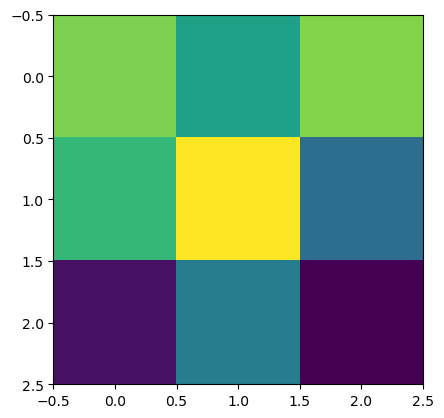

In [13]:
plt.imshow(kernel1_1)